In [1]:
#import data analysis packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
folder_name = 'results/task_match_2003_0105'

jz = pd.read_excel('datasets/job_zone.xlsx').rename(
    columns=lambda x: x.lower().replace(" ", "_")
).drop(columns=['date', 'domain_source']).rename(
    columns={'o*net-soc_code': 'code', 'job_zone': 'zone'}
)

In [80]:
#open json file as dataframe
df = pd.read_json(folder_name + "/simllama3.2_no_prompt_results.json", lines=True).dropna()
df

,title,ref_task,ind,gen_task,iteration,score,matrix,ref_order,gen_order
0,Lodging Managers,[Answer inquiries pertaining to hotel policies...,11,"[Hire, train, and manage staff to provide exce...",0,0.527622,"[[0.4896421432, 0.5792944431, 0.5142156482, 0....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[8, 22, 16, 14, 2, 12, 0, 15, 19, 5, 23, 17, 1..."
1,Spa Managers,"[Respond to customer inquiries or complaints.,...",11,[1. Manage spa operations to ensure high level...,0,0.118828,"[[0.3058664799, 0.0089062266, 0.023672346, 0.0...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[14, 4, 18, 12, 17, 1, 0, 16, 3, 6, 5, 15, 13,..."
2,Training and Development Managers,[Analyze training needs to develop new trainin...,11,[Design and deliver training programs to meet ...,0,0.598191,"[[0.7278247476, 0.4445149004, 0.7042515874, 0....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[9, 6, 11, 10, 0, 1, 3, 4, 7, 8, 2, 5]"
3,Customs Brokers,[Prepare and process import and export documen...,13,"[Clearing goods for customs, Pre-arrival docum...",0,0.501223,"[[0.6063377857000001, 0.5872237682, 0.46647202...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[20, 0, 5, 3, 1, 21, 6, 12, 11, 8, 14, 19, 2, ..."
4,Government Property Inspectors and Investigators,"[Prepare correspondence, reports of inspection...",13,[Reviewing property deeds and title reports to...,0,0.482482,"[[0.4484704137, 0.47980165480000003, 0.3720491...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[11, 0, 1, 4, 8, 7, 3, 6, 9, 5, 10, 12, 2]"
...,...,...,...,...,...,...,...,...,...
425,Power Plant Operators,"[Control generator output to match the phase, ...",51,[Monitoring and controlling power plant equipm...,9,0.485070,"[[0.3537439704, 0.38032037020000004, 0.1508058...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1, 7, 18, 8, 0, 14, 2, 17, 19, 3, 21, 16, 11,..."
426,Nuclear Power Reactor Operators,[Operate nuclear power reactors in accordance ...,51,[Monitoring the reactor's power output and adj...,9,0.548814,"[[0.5092082024, 0.7174116969000001, 0.28478616...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[18, 0, 9, 2, 1, 7, 6, 3, 4, 16, 17, 13, 8, 11..."
427,Metal-Refining Furnace Operators and Tenders,"[Regulate supplies of fuel and air, or control...",51,[Load and transfer metal ingots into furnaces ...,9,0.541616,"[[0.4391596317, 0.7329353094000001, 0.38859799...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[12, 11, 7, 13, 14, 4, 10, 0, 8, 1, 6, 3, 2, 9..."
428,Ship Engineers,"[Monitor engine, machinery, or equipment indic...",53,"[Maintaining and repairing ships' engines, gea...",9,0.547911,"[[0.6380904913000001, 0.4878603816, 0.70863187...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[16, 10, 8, 4, 1, 14, 0, 15, 11, 7, 2, 9, 5, 1..."


Text(0.5, 1.0, 'mean similarity score by industry')

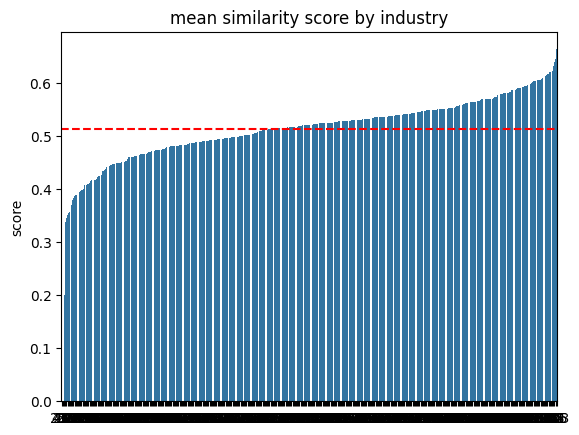

In [5]:
mean_score = df["score"]
#add a average line


#plot the series using column chat
sns.barplot(mean_score, order=mean_score.sort_values().index)
#add a average line
plt.axhline(y=mean_score.mean(), color='r', linestyle='--')

plt.title("mean similarity score by industry")

Text(0.5, 1.0, 'mean similarity score by industry')

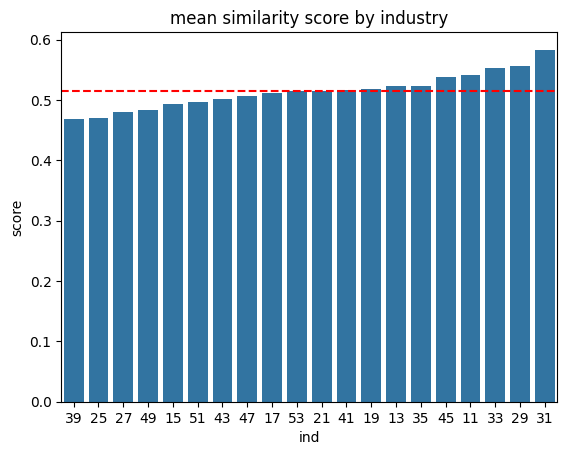

In [6]:
# get mean similarity score base on industry
mean_score = df.groupby("ind")["score"].mean()
#add a average line


#plot the series using column chat
sns.barplot(mean_score, order=mean_score.sort_values().index)
#add a average line
plt.axhline(y=mean_score.mean(), color='r', linestyle='--')

plt.title("mean similarity score by industry")

Text(0.5, 1.0, 'mean similarity score by job zone')

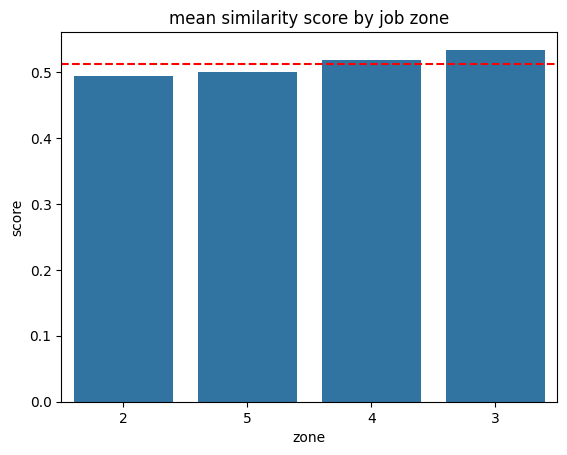

In [7]:
#plot similarity score by job zone
mean_score = df.groupby("zone")["score"].mean()
plt.axhline(y=mean_score.mean(), color='r', linestyle='--')
sns.barplot(mean_score, order=mean_score.sort_values().index)
plt.title("mean similarity score by job zone")

In [8]:
max_similarity = df[df["score"] == df["score"].max()]
max_similarity

,title,ref_task,ind,gen_task,iteration,score,matrix,ref_order,gen_order,code,zone
303,Training and Development Managers,[Analyze training needs to develop new trainin...,11,"[Design, implement, and evaluate training prog...",7,0.662968,"[[0.7438646555, 0.7785505056, 0.6113942862, 0....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[1, 8, 0, 11, 4, 3, 6, 2, 10, 9, 5, 7]",11-3131.00,4


Text(0.5, 1.0, 'similarity matrix of Training and Development Managers')

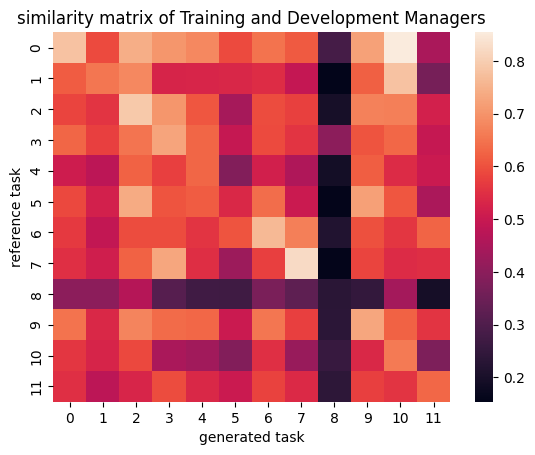

In [9]:
x = max_similarity.index.values[0]
matrix = np.array(df["matrix"][x])
order = df["gen_order"][x]

rearranged_matrix = matrix[:, order]
sns.heatmap(rearranged_matrix, cmap="rocket")
plt.xlabel("generated task")
plt.ylabel("reference task")
plt.title("similarity matrix of " + df["title"][x])

In [10]:
min_similarity = df[df["score"] == df["score"].min()]
min_similarity

,title,ref_task,ind,gen_task,iteration,score,matrix,ref_order,gen_order,code,zone
1,Spa Managers,"[Respond to customer inquiries or complaints.,...",11,[1. Manage spa operations to ensure high level...,0,0.118828,"[[0.3058664799, 0.0089062266, 0.023672346, 0.0...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[14, 4, 18, 12, 17, 1, 0, 16, 3, 6, 5, 15, 13,...",11-9179.02,3


Text(0.5, 1.0, 'similarity matrix of Spa Managers')

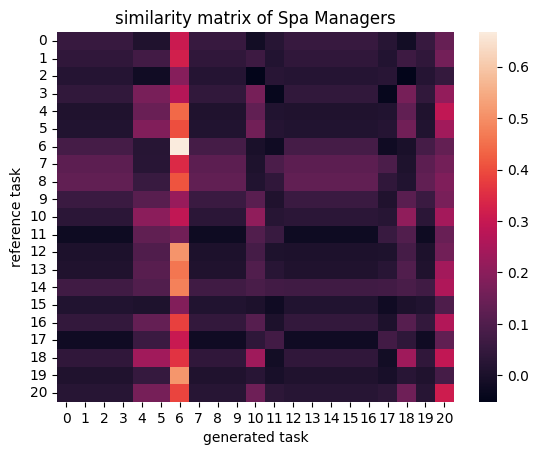

In [11]:
x = min_similarity.index.values[0]
matrix = np.array(df["matrix"][x])
order = df["gen_order"][x]

rearranged_matrix = matrix[:, order]
sns.heatmap(rearranged_matrix, cmap="rocket")
plt.xlabel("generated task")
plt.ylabel("reference task")
plt.title("similarity matrix of " + df["title"][x])

In [12]:
#create a df dropping the rows with matrix shape not equal to (x, x)
df_test = df[df["matrix"].apply(lambda x : np.shape(x)[0] == np.shape(x)[1])]
#define a function to rearrange matrix based on gen_order
def rearrange_matrix(matrix, order):
    return matrix[:, order]
#apply the function to the matrix column
df_test["rearranged_matrix"] = df_test.apply(lambda x : rearrange_matrix(np.array(x["matrix"]), x["gen_order"]), axis=1)



C:\Users\godfr\AppData\Local\Temp\ipykernel_22268\730366682.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["rearranged_matrix"] = df_test.apply(lambda x : rearrange_matrix(np.array(x["matrix"]), x["gen_order"]), axis=1)


In [20]:
# find the best rearranged matrix
def is_diagonally_dominant(rearranged_matrix):
    D = np.abs(np.diag(rearranged_matrix))
    S = np.sum(np.abs(rearranged_matrix), axis=1) - D
    return np.all(D >= S)

def calculate_score(rearranged_matrix):
    score = 0
    for i in range(np.shape(rearranged_matrix)[0]):
        max_off_diagonal = max(abs(rearranged_matrix[i][j]) for j in range(np.shape(rearranged_matrix)[1]) if j != i)
        score += abs(rearranged_matrix[i][i]) - max_off_diagonal
    return score

def find_best_rearranged_matrix(df):
    best_score = -float('inf')
    best_index = None
    for index, row in df.iterrows():
        rearranged_matrix = row['rearranged_matrix']
        if is_diagonally_dominant(rearranged_matrix):
            score = calculate_score(rearranged_matrix)
            if score > best_score:
                best_score = score
                best_index = index
    if best_index is not None:
        return best_index, best_score
    else:
        # If no diagonally dominant rearranged_matrix found, consider all with highest score
        for index, row in df.iterrows():
            rearranged_matrix = row['rearranged_matrix']
            score = calculate_score(rearranged_matrix)
            if score > best_score:
                best_score = score
                best_index = index
        return best_index, best_score

In [21]:
# Example usage
index, score = find_best_rearranged_matrix(df_test)
if index is not None:
    print(f"The best rearranged_matrix is at index {index} with score {score}")
else:
    print("No suitable rearranged_matrix found.")

The best rearranged_matrix is at index 229 with score 1.3520641329000003


In [49]:
df_test = df[df["matrix"].apply(lambda x : np.shape(x)[0] == np.shape(x)[1])]
df_test = calculate_similarity(df_test)
df_test

,title,ref_task,ind,gen_task,iteration,score,matrix,ref_order,gen_order,rearranged_matrix,diagonal_similarity,off_diagonal_similarity,difference
0,Lodging Managers,[Answer inquiries pertaining to hotel policies...,11,"[Hire, train, and manage staff to provide exce...",0,0.527622,"[[0.4896421432, 0.5792944431, 0.5142156482, 0....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[8, 22, 16, 14, 2, 12, 0, 15, 19, 5, 23, 17, 1...","[[0.5897837877000001, 0.6363177896000001, 0.48...",0.527622,0.306830,0.220792
1,Spa Managers,"[Respond to customer inquiries or complaints.,...",11,[1. Manage spa operations to ensure high level...,0,0.118828,"[[0.3058664799, 0.0089062266, 0.023672346, 0.0...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[14, 4, 18, 12, 17, 1, 0, 16, 3, 6, 5, 15, 13,...","[[0.053293976900000005, 0.053293883800000004, ...",0.118828,0.066693,0.052135
2,Training and Development Managers,[Analyze training needs to develop new trainin...,11,[Design and deliver training programs to meet ...,0,0.598191,"[[0.7278247476, 0.4445149004, 0.7042515874, 0....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[9, 6, 11, 10, 0, 1, 3, 4, 7, 8, 2, 5]","[[0.7609828115, 0.6676673293000001, 0.41249826...",0.598191,0.428204,0.169988
3,Customs Brokers,[Prepare and process import and export documen...,13,"[Clearing goods for customs, Pre-arrival docum...",0,0.501223,"[[0.6063377857000001, 0.5872237682, 0.46647202...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[20, 0, 5, 3, 1, 21, 6, 12, 11, 8, 14, 19, 2, ...","[[0.6926140189000001, 0.6063377857000001, 0.53...",0.501223,0.302016,0.199207
4,Government Property Inspectors and Investigators,"[Prepare correspondence, reports of inspection...",13,[Reviewing property deeds and title reports to...,0,0.482482,"[[0.4484704137, 0.47980165480000003, 0.3720491...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[11, 0, 1, 4, 8, 7, 3, 6, 9, 5, 10, 12, 2]","[[0.7342790365, 0.4484704137, 0.47980165480000...",0.482482,0.302672,0.179810
...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,Power Plant Operators,"[Control generator output to match the phase, ...",51,[Monitoring and controlling power plant equipm...,9,0.485070,"[[0.3537439704, 0.38032037020000004, 0.1508058...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1, 7, 18, 8, 0, 14, 2, 17, 19, 3, 21, 16, 11,...","[[0.38032037020000004, 0.0289092604, 0.1749171...",0.485070,0.317175,0.167895
426,Nuclear Power Reactor Operators,[Operate nuclear power reactors in accordance ...,51,[Monitoring the reactor's power output and adj...,9,0.548814,"[[0.5092082024, 0.7174116969000001, 0.28478616...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[18, 0, 9, 2, 1, 7, 6, 3, 4, 16, 17, 13, 8, 11...","[[0.4733139873, 0.5092082024, 0.402205348, 0.2...",0.548814,0.352534,0.196280
427,Metal-Refining Furnace Operators and Tenders,"[Regulate supplies of fuel and air, or control...",51,[Load and transfer metal ingots into furnaces ...,9,0.541616,"[[0.4391596317, 0.7329353094000001, 0.38859799...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[12, 11, 7, 13, 14, 4, 10, 0, 8, 1, 6, 3, 2, 9...","[[0.7135587335, 0.5364527106, 0.5042862296, 0....",0.541616,0.340947,0.200669
428,Ship Engineers,"[Monitor engine, machinery, or equipment indic...",53,"[Maintaining and repairing ships' engines, gea...",9,0.547911,"[[0.6380904913000001, 0.4878603816, 0.70863187...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[16, 10, 8, 4, 1, 14, 0, 15, 11, 7, 2, 9, 5, 1...","[[0.6931935549, 0.5178272128, 0.4664486051, 0....",0.547911,0.335576,0.212335


In [35]:
max_difference = df_test[df_test["difference"] == df_test["difference"].max()]
max_difference

,title,ref_task,ind,gen_task,iteration,score,matrix,ref_order,gen_order,code,zone,rearranged_matrix,diagonal_similarity,off_diagonal_similarity,difference
101,"Business Teachers, Postsecondary",[Prepare and deliver lectures to undergraduate...,25,[Design and develop curriculum for business-re...,2,0.538313,"[[0.5866289735, 0.7561229467, 0.3716852665, 0....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1, 2, 3, 4, 5, 10, 9, 20, 24, 16, 6, 7, 0, 19...",25-1011.00,5,"[[0.7561229467, 0.3716852665, 0.36800783870000...",0.538313,0.266022,0.272291


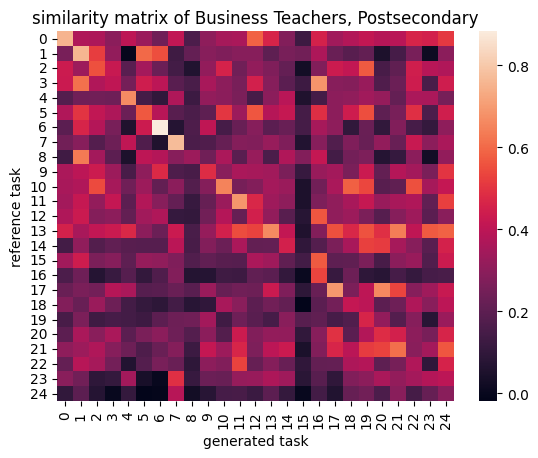

In [36]:
x = max_difference.index.values[0]
matrix = np.array(df["matrix"][x])
order = df["gen_order"][x]

rearranged_matrix = matrix[:, order]
sns.heatmap(rearranged_matrix, cmap="rocket")
plt.xlabel("generated task")
plt.ylabel("reference task")
plt.title("similarity matrix of " + df["title"][x])
#save the plot under the folder name results
plt.savefig("results/similarity_matrix"+ df["title"][x] + ".png")

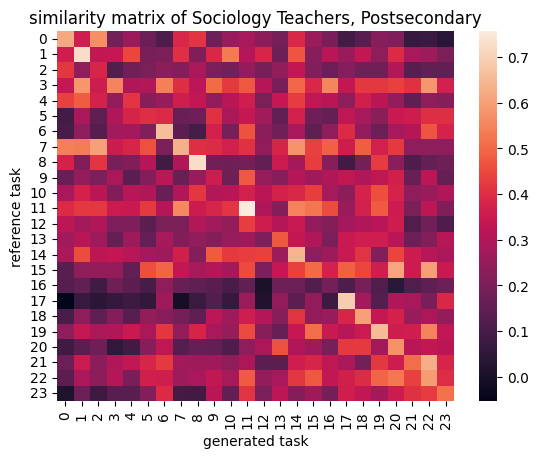

In [53]:
x = index
matrix = np.array(df["matrix"][x])
order = df["gen_order"][x]

rearranged_matrix = matrix[:, order]
sns.heatmap(rearranged_matrix, cmap="rocket")
plt.xlabel("generated task")
plt.ylabel("reference task")
plt.title("similarity matrix of " + df["title"][x])
#save the plot under the folder name results
plt.savefig("results/similarity_matrix"+ df["title"][x] + ".png")

In [20]:
mean = df["score"].mean()
np.save(folder_name + "/score.npy", mean)

<function matplotlib.pyplot.show(close=None, block=None)>

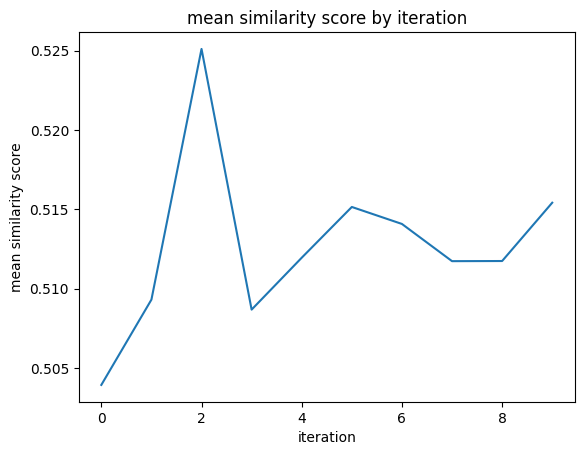

In [59]:
# Group the df by iteration and calculate the mean score of the score column
df_grouped = df.groupby("iteration")["score"].mean()
#plot the series using column chat
sns.lineplot(df_grouped)
plt.title("mean similarity score by iteration")
plt.xlabel("iteration")
plt.ylabel("mean similarity score")
plt.show


In [51]:
# load all the json files in the folder
import os
import json
import re
import numpy as np  
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt

In [134]:
# rearrange the matrix based on the best gen_order
def rearrange_matrix(matrix, order):
    return matrix[:, order]
#for a rearranged matrix, calculate two things. 1 is the mean similarity of the diagonal, and 2 the mean similarity of the off-diagonal
def calculate_diagonal_similarity(rearranged_matrix):
    return np.mean(np.diag(rearranged_matrix))

def calculate_off_diagonal_similarity(rearranged_matrix):
    off_diagonal = np.abs(rearranged_matrix) - np.diag(np.abs(np.diag(rearranged_matrix)))
    return np.mean(off_diagonal)

#package to a function for later use
def calculate_similarity(df):
    #create a df dropping the rows with matrix shape not equal to (x, x)
    df = df[df["matrix"].apply(lambda x : np.shape(x)[0] == np.shape(x)[1])]
    #define a function to rearrange matrix based on gen_order
    df = df.copy()
    df.loc[:, "rearranged_matrix"] = df.apply(lambda x : rearrange_matrix(np.array(x["matrix"]), x["gen_order"]), axis=1)
    #apply the functions to new column diagonal_similarity and off_diagonal_similarity
    df = df.copy()
    df.loc[:, "diagonal_similarity"] = df["rearranged_matrix"].apply(calculate_diagonal_similarity)
    df = df.copy()
    df.loc[:, "off_diagonal_similarity"] = df["rearranged_matrix"].apply(calculate_off_diagonal_similarity)
    # add a column to the df that is the difference between the two
    df["difference"] = df["diagonal_similarity"] - df["off_diagonal_similarity"]
    return df

def join_iteration(df):
    df = df.groupby(["title", "ind"], group_keys=False).apply(lambda x: pd.Series({
        "score": np.array(x["score"]),
        "diagonal_similarity": np.array(x["diagonal_similarity"]),
        "off_diagonal_similarity": np.array(x["off_diagonal_similarity"]),
        "difference": np.array(x["difference"])
    })).reset_index()
    return df

def mean_difference_array(df):
    #get the mean difference in df, by iteration, into a np array
    return df.groupby("iteration")["difference"].mean().to_numpy()

In [ ]:
# only open files start with sim
folder_name = 'results/task_match_2003_0105'
files = os.listdir(folder_name)

for file in files:
    if not re.match(r"sim.*\.json", file):





In [ ]:
df = pd.read_json(folder_name + "/simmistral_prompt1_results.json", lines=True).dropna()
df = calculate_similarity(df)




df_grouped = join_iteration(df)

# Convert df_grouped["score"] to a NumPy array
score = np.array(df_grouped["score"].to_list())
# convert df_grouped["diagonal"_similarity] to a NumPy array
diagonal_similarity = np.array(df_grouped["diagonal_similarity"].to_list())
# convert df_grouped["off_diagonal_similarity"] to a NumPy array
off_diagonal_similarity = np.array(df_grouped["off_diagonal_similarity"].to_list())
# convert df_grouped["difference"] to a NumPy array
difference = np.array(df_grouped["difference"].to_list())

# merge with jone zone jz
df_grouped = df_grouped.merge(jz, on="title", how="left")




C:\Users\godfr\AppData\Local\Temp\ipykernel_22268\931189693.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(["title", "ind"], group_keys=False).apply(lambda x: pd.Series({


array([0.20493051, 0.20846685, 0.20619456, 0.20507388, 0.20149434,
       0.20334508, 0.20396144, 0.20486242, 0.20010561, 0.20817143])

In [122]:
import numpy as np
import matplotlib.pyplot as plt

def var_ana(data):

    # Calculate variance and standard deviation for each occupation across the 10 trials
    variances = np.var(data, axis=1)
    std_devs = np.std(data, axis=1)

    # Print basic stats
    # print("Variance per occupation:", variances)
    # print("Standard deviation per occupation:", std_devs)
    print(f"Average variance across occupations: {np.mean(variances):.4f}")
    print(f"Average standard deviation across occupations: {np.mean(std_devs):.4f}")

    # Plot the standard deviation for each occupation
    plt.figure(figsize=(10, 6))
    plt.bar(range(43), std_devs, color='skyblue')
    plt.xlabel('Occupation Index')
    plt.ylabel('Standard Deviation of Scores')
    plt.title('Standard Deviation of Scores Across 10 Trials per Occupation')
    plt.axhline(y=np.mean(std_devs), color='red', linestyle='--', label=f'Mean SD: {np.mean(std_devs):.4f}')
    plt.legend()
    plt.show()

    # Corrected cumulative standard error calculation
    cumulative_se = []
    for i in range(10):
        # Standard deviation of scores up to trial i+1, then divide by sqrt(number of occupations)
        std_per_trial = np.std(data[:, :i+1], axis=0)  # SD across occupations for each trial
        se_per_trial = std_per_trial / np.sqrt(43)      # SE = SD / sqrt(n), where n = 43 occupations
        cumulative_se.append(np.mean(se_per_trial))      # Average SE across trials up to i+1

    # Plot cumulative standard error
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), cumulative_se, marker='o', color='purple')
    plt.xlabel('Number of Trials')
    plt.ylabel('Average Standard Error')
    plt.title('Average Standard Error vs. Number of Trials')
    plt.grid(True)
    plt.show()


Average variance across occupations: 0.0003
Average standard deviation across occupations: 0.0151


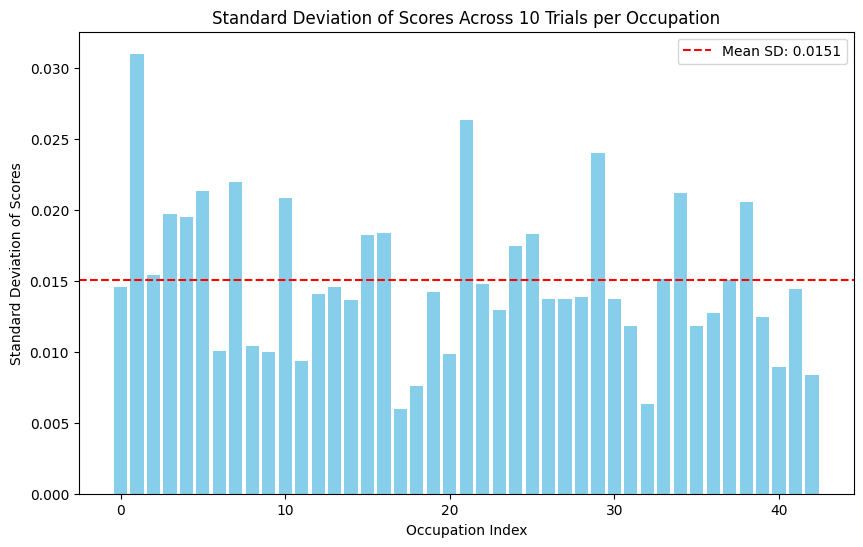

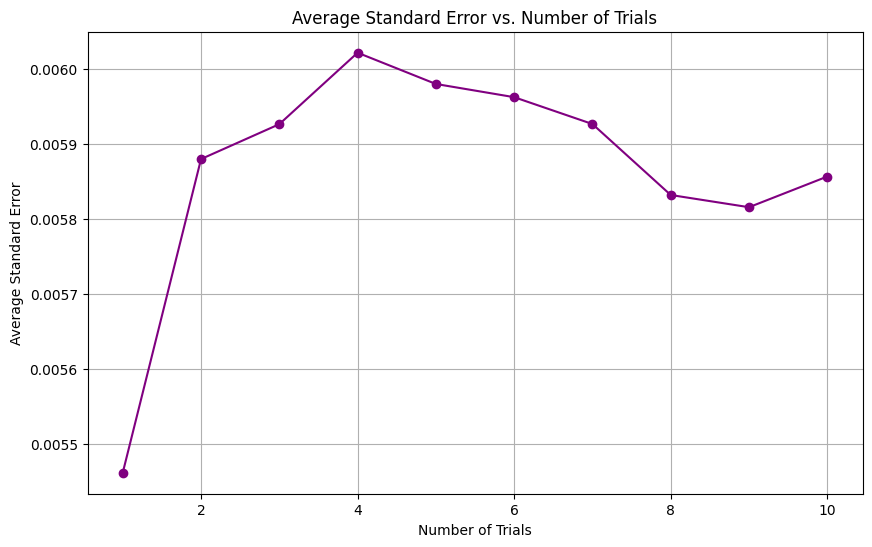

In [128]:
var_ana(difference)

Descriptive Statistics:
Llama3.2 No Prompt: Mean = 0.5127, Variance = 0.0000
Llama3.2 Prompt: Mean = 0.5123, Variance = 0.0001
Mistral No Prompt: Mean = 0.5434, Variance = 0.0000
Mistral Prompt: Mean = 0.5388, Variance = 0.0000

Levene's Test for Equal Variances: p-value = 0.0979

ANOVA Results:
F-statistic: 92.4377
p-value: 0.0000
Result: Reject the null hypothesis. There is a significant difference between the groups.


C:\Users\godfr\AppData\Local\Temp\ipykernel_1096\640280290.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels)


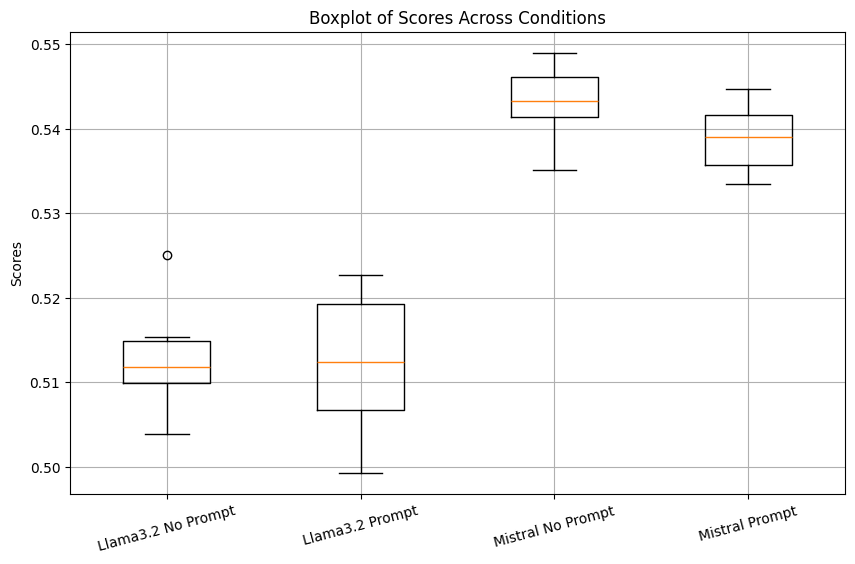

In [114]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Your data
llama_no_prompt = np.array([0.5039232, 0.50930329, 0.52511645, 0.50867349, 0.51194677,
                            0.515148, 0.51407667, 0.5117296, 0.51173824, 0.51541647])
llama_prompt = np.array([0.51757216, 0.50708026, 0.51998864, 0.5227556, 0.51259404,
                         0.50669711, 0.50500775, 0.49927995, 0.5198707, 0.51234995])
mistral_no_prompt = np.array([0.53512039, 0.54458822, 0.54895841, 0.542721, 0.54384152,
                              0.54714253, 0.54657047, 0.54275112, 0.54079992, 0.541023])
mistral_prompt = np.array([0.53513, 0.54465914, 0.54178201, 0.53758473, 0.53460058,
                           0.53753162, 0.54101435, 0.54190746, 0.5334765, 0.54045374])

# Group labels for clarity
groups = [llama_no_prompt, llama_prompt, mistral_no_prompt, mistral_prompt]
labels = ['Llama3.2 No Prompt', 'Llama3.2 Prompt', 'Mistral No Prompt', 'Mistral Prompt']

# Descriptive stats
print("Descriptive Statistics:")
for label, group in zip(labels, groups):
    print(f"{label}: Mean = {np.mean(group):.4f}, Variance = {np.var(group):.4f}")

# Check for equal variances (Levene's test)
levene_stat, levene_p = stats.levene(*groups)
print(f"\nLevene's Test for Equal Variances: p-value = {levene_p:.4f}")
if levene_p < 0.05:
    print("Warning: Variances may not be equal (p < 0.05). Consider a robust alternative if significant.")

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(*groups)
print(f"\nANOVA Results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Result: Reject the null hypothesis. There is a significant difference between the groups.")
else:
    print("Result: Fail to reject the null hypothesis. No significant difference between the groups.")

# Boxplot for visualization
plt.figure(figsize=(10, 6))
plt.boxplot(groups, labels=labels)
plt.ylabel('Scores')
plt.title('Boxplot of Scores Across Conditions')
plt.grid(True)
plt.xticks(rotation=15)
plt.show()

In [115]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Combine data for Tukey HSD
all_data = np.concatenate(groups)
group_labels = np.concatenate([[label] * 10 for label in labels])

# Perform Tukey HSD
tukey = pairwise_tukeyhsd(endog=all_data, groups=group_labels, alpha=0.05)
print("\nTukey HSD Post-Hoc Test:")
print(tukey)


Tukey HSD Post-Hoc Test:
           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
      group1             group2      meandiff p-adj   lower  upper  reject
--------------------------------------------------------------------------
Llama3.2 No Prompt   Llama3.2 Prompt  -0.0004 0.9985  -0.007 0.0062  False
Llama3.2 No Prompt Mistral No Prompt   0.0306    0.0  0.0241 0.0372   True
Llama3.2 No Prompt    Mistral Prompt   0.0261    0.0  0.0195 0.0327   True
   Llama3.2 Prompt Mistral No Prompt    0.031    0.0  0.0245 0.0376   True
   Llama3.2 Prompt    Mistral Prompt   0.0265    0.0  0.0199 0.0331   True
 Mistral No Prompt    Mistral Prompt  -0.0045 0.2637 -0.0111  0.002  False
--------------------------------------------------------------------------


In [121]:
import numpy as np
from scipy import stats
from statsmodels.stats.power import FTestAnovaPower

# Your data
llama_no_prompt = np.array([0.5039232, 0.50930329, 0.52511645, 0.50867349, 0.51194677,
                            0.515148, 0.51407667, 0.5117296, 0.51173824, 0.51541647])
llama_prompt = np.array([0.51757216, 0.50708026, 0.51998864, 0.5227556, 0.51259404,
                         0.50669711, 0.50500775, 0.49927995, 0.5198707, 0.51234995])
mistral_no_prompt = np.array([0.53512039, 0.54458822, 0.54895841, 0.542721, 0.54384152,
                              0.54714253, 0.54657047, 0.54275112, 0.54079992, 0.541023])
mistral_prompt = np.array([0.53513, 0.54465914, 0.54178201, 0.53758473, 0.53460058,
                           0.53753162, 0.54101435, 0.54190746, 0.5334765, 0.54045374])
groups = [llama_no_prompt, llama_prompt, mistral_no_prompt, mistral_prompt]

# Run ANOVA
f_stat, p_value = stats.f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")

# Calculate effect size (η²) correctly
n_total = len(llama_no_prompt) * len(groups)  # Total observations (40)
k = len(groups)  # Number of groups (4)
df_between = k - 1  # Degrees of freedom between groups (3)
df_within = n_total - k  # Degrees of freedom within groups (36)
ss_between = f_stat * df_within / (df_between * n_total)  # Adjusted SS_between approximation
ss_total = np.var(np.concatenate(groups), ddof=1) * (n_total - 1)  # Total sum of squares
eta_squared = (f_stat * df_between) / (f_stat * df_between + df_within)
print(f"Effect Size (η²): {eta_squared:.4f}")

# Convert η² to Cohen's f
cohen_f = np.sqrt(eta_squared / (1 - eta_squared))
print(f"Cohen's f: {cohen_f:.4f}")

# Power analysis
power_analysis = FTestAnovaPower()
alpha = 0.05  # Significance level
power = 0.8   # Desired power

# Check if Cohen's f is reasonable
if cohen_f <= 0 or np.isnan(cohen_f):
    raise ValueError("Invalid effect size for power analysis. Check ANOVA results.")

# Calculate required sample size per group
sample_size = power_analysis.solve_power(effect_size=cohen_f, nobs=None, alpha=alpha, power=power, k_groups=k)
print(f"Required sample size per group: {int(np.ceil(sample_size))} runs (for power = {power}, alpha = {alpha})")

ANOVA F-statistic: 92.4377, p-value: 0.0000
Effect Size (η²): 0.8851
Cohen's f: 2.7755
Required sample size per group: 40 runs (for power = 0.8, alpha = 0.05)


c:\Users\godfr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\power.py:524: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
C:\Users\godfr\AppData\Local\Temp\ipykernel_1096\631704331.py:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Required sample size per group: {int(np.ceil(sample_size))} runs (for power = {power}, alpha = {alpha})")


In [126]:
import numpy as np
from scipy import stats
from statsmodels.stats.power import TTestIndPower

# Your data
llama_no_prompt = np.array([0.5039232, 0.50930329, 0.52511645, 0.50867349, 0.51194677,
                            0.515148, 0.51407667, 0.5117296, 0.51173824, 0.51541647])
llama_prompt = np.array([0.51757216, 0.50708026, 0.51998864, 0.5227556, 0.51259404,
                         0.50669711, 0.50500775, 0.49927995, 0.5198707, 0.51234995])
mistral_no_prompt = np.array([0.53512039, 0.54458822, 0.54895841, 0.542721, 0.54384152,
                              0.54714253, 0.54657047, 0.54275112, 0.54079992, 0.541023])
mistral_prompt = np.array([0.53513, 0.54465914, 0.54178201, 0.53758473, 0.53460058,
                           0.53753162, 0.54101435, 0.54190746, 0.5334765, 0.54045374])

# Function to compute Cohen's d and perform power analysis
def analyze_pair(group1, group2, label1, label2):
    # ANOVA (or t-test equivalent)
    f_stat, p_value = stats.f_oneway(group1, group2)
    print(f"\n{label1} vs. {label2}:")
    print(f"F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")

    # Cohen's d (effect size for two groups)
    mean_diff = np.mean(group1) - np.mean(group2)
    pooled_std = np.sqrt((np.var(group1, ddof=1) + np.var(group2, ddof=1)) / 2)
    cohen_d = mean_diff / pooled_std
    print(f"Cohen's d: {cohen_d:.4f}")

    # Power analysis
    power_analysis = TTestIndPower()
    alpha = 0.05
    power = 0.8
    sample_size = power_analysis.solve_power(effect_size=abs(cohen_d), nobs1=None, alpha=alpha, power=power, ratio=1.0)
    print(f"Required sample size per group: {int(np.ceil(sample_size))} runs (for power = {power}, alpha = {alpha})")

# Analyze Llama3.2
analyze_pair(llama_no_prompt, llama_prompt, "Llama3.2 No Prompt", "Llama3.2 Prompt")

# Analyze Mistral
analyze_pair(mistral_no_prompt, mistral_prompt, "Mistral No Prompt", "Mistral Prompt")


Llama3.2 No Prompt vs. Llama3.2 Prompt:
F-statistic: 0.0167, p-value: 0.8987
Cohen's d: 0.0577
Required sample size per group: 4713 runs (for power = 0.8, alpha = 0.05)

Mistral No Prompt vs. Mistral Prompt:
F-statistic: 7.0885, p-value: 0.0159
Cohen's d: 1.1907
Required sample size per group: 13 runs (for power = 0.8, alpha = 0.05)
